In [1]:
# Import pandas, numpy, and matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file and show the data
df = pd.read_csv("volume_pressure_data.csv")
print(df)

    Volume  Pressure
0       48   29.1250
1       46   30.5625
2       44   31.9375
3       42   33.5000
4       40   35.3125
5       38   37.0000
6       36   39.3125
7       34   41.6250
8       32   44.1875
9       30   47.0625
10      28   50.3125
11      26   54.3125
12      24   58.8125
13      23   61.3125
14      22   64.0625
15      21   67.0625
16      20   70.6875
17      19   74.1250
18      18   77.8750
19      17   82.7500
20      16   87.8750
21      15   93.0625
22      14  100.4375
23      13  107.8125
24      12  117.5625


In [2]:
# Show the first 3 lines of data
print("The first three lines of the data:")
print(df.head(3))

The first three lines of the data:
   Volume  Pressure
0      48   29.1250
1      46   30.5625
2      44   31.9375


In [3]:
# Use Pandas to calculate volume’s mean, median, and standard deviation

mean_volume = df["Volume"].mean()
print("volume's mean is:",mean_volume)

median_volume = df["Volume"].median()
print("volume's median is:", median_volume)

standard_deviation_volume = df["Volume"].std()
print("volume's standard deviation is:", standard_deviation_volume)

volume's mean is: 27.12
volume's median is: 24.0
volume's standard deviation is: 11.192705958197358


In [4]:
#Use Pandas to calculate pressure’s mean, median, and standard deviation

mean_pressure = df["Pressure"].mean()
print("pressure's mean is:", mean_pressure)

median_pressure = df["Pressure"].median()
print("pressure's median is:", median_pressure)

standard_deviation_pressure = df["Pressure"].std()
print("pressure's standard deviation is:", standard_deviation_pressure)

pressure's mean is: 61.5075
pressure's median is: 58.8125
pressure's standard deviation is: 25.84054620407626


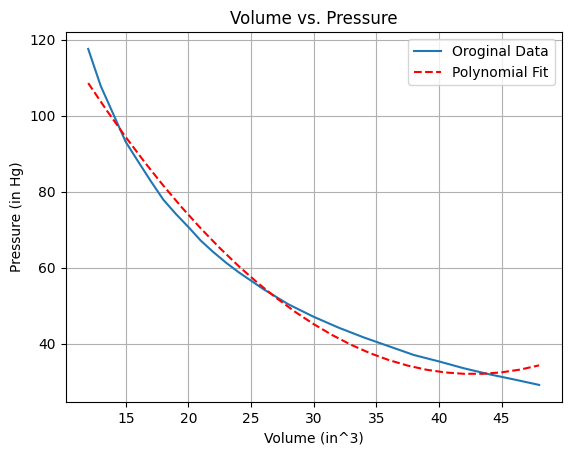

In [5]:
# Plot the volume vs. pressure data

x = df["Volume"]
y = df["Pressure"]
plt.plot(x,y, label = 'Oroginal Data')
plt.xlabel("Volume (in^3)")
plt.ylabel("Pressure (in Hg)")
plt.title("Volume vs. Pressure")
plt.grid()

# Fit a polynomial curve to the volume vs. pressure data and plot the fitted data
fit_coefficient =  np.polyfit(x,y,2)
polynomial_fit = np.poly1d(fit_coefficient)
volume_range = np.linspace(df['Volume'].min(), df['Volume'].max(), 25)
pressure_fit = polynomial_fit(volume_range)
plt.plot(volume_range, pressure_fit, color = 'red', linestyle = '--', label = 'Polynomial Fit')
plt.legend()

plt.show()

In [6]:
# Write down the fitted curve equation

equation = f"Pressure = {fit_coefficient[0]} * Volume^2 + {fit_coefficient[1]} * Volume + {fit_coefficient[2]}"
print("Curve equation:", equation)

Curve equation: Pressure = 0.0811467651750768 * Volume^2 + -6.932616648021899 * Volume + 180.0779077281301


In [7]:
# Discuss whether the fitted volume vs. pressure data aligns with Boyle’s Law

if all(m * n == volume_range[0] * pressure_fit[0] for m, n in zip(volume_range, pressure_fit)):
    print("Polynomial fitted data aligns with Boyle’s Law.")
else:
    print("Polynomial fitted data doesn't align with Boyle’s Law, the gas is not an ideal gas, beacuse the gas molecule has volume and there are interactions between gas molecules.")
          
    

Polynomial fitted data doesn't align with Boyle’s Law, the gas is not an ideal gas, beacuse the gas molecule has volume and there are interactions between gas molecules.


In [8]:
# Calculate the root mean square error

rmse = np.sqrt(np.mean((df["Pressure"] - pressure_fit) ** 2))
print("RMSE = ", rmse)


# Report the RMSE value and discuss whether the polynomial fit represents the data well

if rmse < 1: 
    print("The polynomial fit represents the data well.")
else:
    print("The polynomial fit does not represent the data well.")

RMSE =  47.765993012529485
The polynomial fit does not represent the data well.
